In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [2]:
# Import the datasets

dfHistorical = pd.read_csv('historical-all-nba.csv')
dfCurrent = pd.read_csv('current-all-nba.csv')

In [3]:
dfHistorical.head()

,Player,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,VORP,BPM,All-NBA,All-Star
0,George Gervin,SAS,78.0,41.0,10,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,3.1,2.2,1,1
1,Eddie Johnson,ATL,79.0,50.0,6,33.2,18.5,2.5,4.7,1.5,0.3,0.487,0.385,0.828,8.2,0.150,2.8,2.2,0,1
2,Moses Malone,HOU,82.0,41.0,9,38.3,25.8,14.5,1.8,1.0,1.3,0.502,0.000,0.719,11.9,0.183,3.8,2.8,1,1
3,Julius Erving,PHI,78.0,59.0,3,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,6.5,7.2,1,1
4,John Drew,ATL,80.0,50.0,6,28.8,19.5,5.9,1.3,1.1,0.3,0.453,0.000,0.757,6.4,0.134,0.8,-0.7,0,1


# Visualizing All-NBA selections

In [4]:
all_nba = dfHistorical.loc[dfHistorical['All-NBA'] == 1]
non_all_nba = dfHistorical.loc[dfHistorical['All-NBA'] == 0]

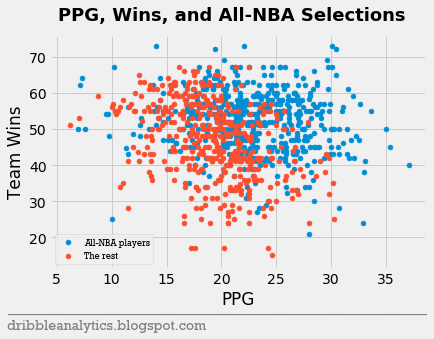

In [5]:
plt.style.use('fivethirtyeight')

ppg_wins, ax = plt.subplots()

ax.scatter(all_nba['PTS'], all_nba['Team Wins'], label = "All-NBA players", s = 25)
ax.scatter(non_all_nba['PTS'], non_all_nba['Team Wins'], label = "The rest", s = 25)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('Team Wins')

ppg_wins.suptitle("PPG, Wins, and All-NBA Selections", weight = 'bold', size = 18)

ppg_wins.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ppg_wins.text(x = -0.02, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

ppg_wins.savefig('ppg_wins.png', dpi = 400, bbox_inches = 'tight')

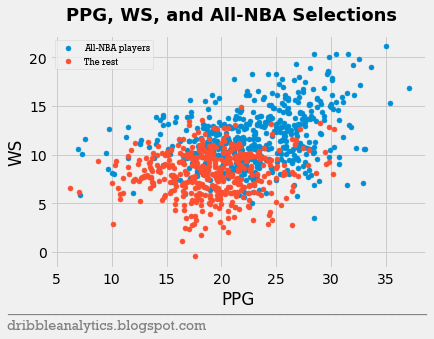

In [6]:
plt.style.use('fivethirtyeight')

ppg_ws, ax = plt.subplots()

ax.scatter(all_nba['PTS'], all_nba['WS'], label = "All-NBA players", s = 25)
ax.scatter(non_all_nba['PTS'], non_all_nba['WS'], label = "The rest", s = 25)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('WS')

ppg_ws.suptitle("PPG, WS, and All-NBA Selections", weight = 'bold', size = 18)

ppg_ws.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ppg_ws.text(x = -0.02, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

ppg_ws.savefig('ppg_ws.png', dpi = 400, bbox_inches = 'tight')

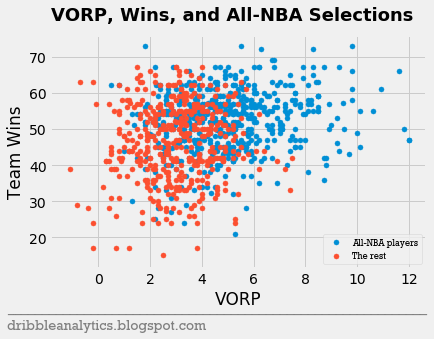

In [7]:
vorp_wins, ax = plt.subplots()

ax.scatter(all_nba['VORP'], all_nba['Team Wins'], label = "All-NBA players", s = 25)
ax.scatter(non_all_nba['VORP'], non_all_nba['Team Wins'], label = "The rest", s = 25)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('VORP')
ax.set_ylabel('Team Wins')

vorp_wins.suptitle("VORP, Wins, and All-NBA Selections", weight = 'bold', size = 18)

vorp_wins.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

vorp_wins.text(x = -0.02, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

vorp_wins.savefig('vorp_wins.png', dpi = 400, bbox_inches = 'tight')

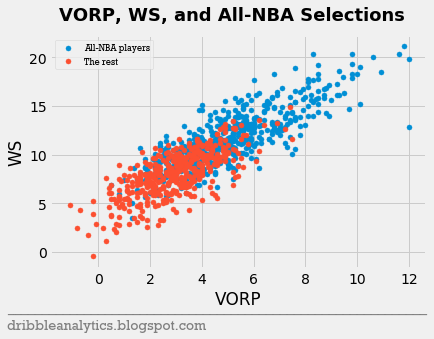

In [8]:
vorp_ws, ax = plt.subplots()

ax.scatter(all_nba['VORP'], all_nba['WS'], label = "All-NBA players", s = 25)
ax.scatter(non_all_nba['VORP'], non_all_nba['WS'], label = "The rest", s = 25)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('VORP')
ax.set_ylabel('WS')

vorp_ws.suptitle("VORP, WS, and All-NBA Selections", weight = 'bold', size = 18)

vorp_ws.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

vorp_ws.text(x = -0.02, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

vorp_ws.savefig('vorp_ws.png', dpi = 400, bbox_inches = 'tight')

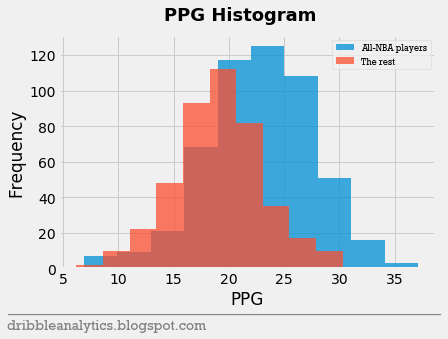

In [9]:
ppg_hist, ax = plt.subplots()

ax.hist(all_nba['PTS'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba['PTS'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('Frequency')

ppg_hist.suptitle("PPG Histogram", weight = 'bold', size = 18)

ppg_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ppg_hist.text(x = -0.04, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

ppg_hist.savefig('ppg_hist.png', dpi = 400, bbox_inches = 'tight')

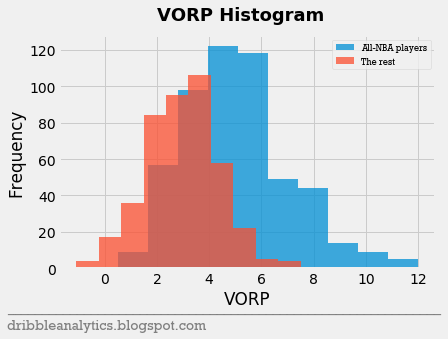

In [10]:
vorp_hist, ax = plt.subplots()

ax.hist(all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('VORP')
ax.set_ylabel('Frequency')

vorp_hist.suptitle("VORP Histogram", weight = 'bold', size = 18)

vorp_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

vorp_hist.text(x = -0.04, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

vorp_hist.savefig('vorp_hist.png', dpi = 400, bbox_inches = 'tight')

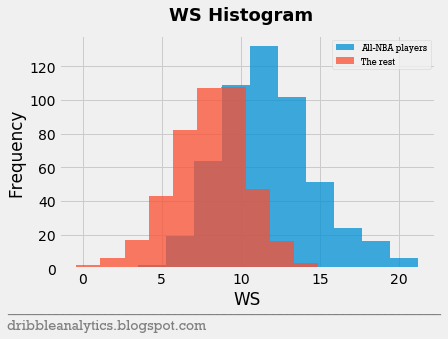

In [11]:
ws_hist, ax = plt.subplots()

ax.hist(all_nba['WS'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba['WS'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('WS')
ax.set_ylabel('Frequency')

ws_hist.suptitle("WS Histogram", weight = 'bold', size = 18)

ws_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ws_hist.text(x = -0.04, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

ws_hist.savefig('ws_hist.png', dpi = 400, bbox_inches = 'tight')

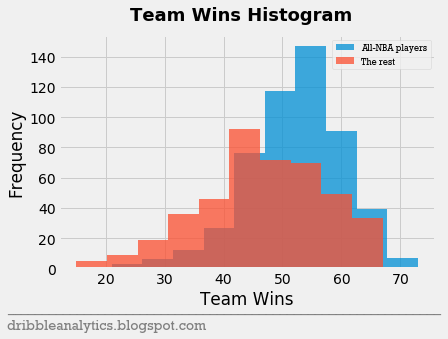

In [12]:
wins_hist, ax = plt.subplots()

ax.hist(all_nba['Team Wins'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba['Team Wins'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('Team Wins')
ax.set_ylabel('Frequency')

wins_hist.suptitle("Team Wins Histogram", weight = 'bold', size = 18)

wins_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

wins_hist.text(x = -0.04, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

wins_hist.savefig('wins_hist.png', dpi = 400, bbox_inches = 'tight')

# Create models

In [13]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 36)

xtrain = train[['Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'VORP', 'WS', 'All-Star']]
ytrain = train[['All-NBA']]

xtest = test[['Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'VORP', 'WS', 'All-Star']]
ytest = test[['All-NBA']]

print("Training set size: %.0f" % len(xtrain))
print("Testing set size: %.0f" % len(xtest))

Training set size: 717
Testing set size: 239


In [14]:
# Create function that gives accuracy scores for each model

def scores(model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Accuracy score: %.3f" % metrics.accuracy_score(ytest, y_pred))
    print("Recall: %.3f" % metrics.recall_score(ytest, y_pred))
    print("Precision: %.3f" % metrics.precision_score(ytest, y_pred))
    print("F1: %.3f" % metrics.f1_score(ytest, y_pred))
    
    proba = model.predict_proba(xtest)
    print("Log loss: %.3f" % metrics.log_loss(ytest, proba))

    pos_prob = proba[:, 1]
    print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytest, pos_prob))
    
    cv = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'accuracy')
    print("Accuracy (cross validation score): %0.3f (+/- %0.3f)" % (cv.mean(), cv.std() * 2))
    
    return y_pred

In [15]:
svc = SVC(kernel = 'rbf', gamma = 1e-3, C = 100, probability = True)

y_svc = scores(svc)

Accuracy score: 0.837
Recall: 0.850
Precision: 0.844
F1: 0.847
Log loss: 0.416
Area under ROC curve: 0.887
Accuracy (cross validation score): 0.766 (+/- 0.081)


In [16]:
rf = RandomForestClassifier(random_state = 999, n_estimators = 100, criterion = 'gini')

y_rf = scores(rf)

Accuracy score: 0.808
Recall: 0.819
Precision: 0.819
F1: 0.819
Log loss: 0.416
Area under ROC curve: 0.889
Accuracy (cross validation score): 0.766 (+/- 0.100)


In [17]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, weights = 'uniform')

y_knn = scores(knn)

Accuracy score: 0.803
Recall: 0.772
Precision: 0.845
F1: 0.807
Log loss: 0.403
Area under ROC curve: 0.897
Accuracy (cross validation score): 0.783 (+/- 0.075)


In [18]:
dnn = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = 100, random_state = 999, activation = 'relu')

y_dnn = scores(dnn)

Accuracy score: 0.808
Recall: 0.819
Precision: 0.819
F1: 0.819
Log loss: 0.430
Area under ROC curve: 0.885
Accuracy (cross validation score): 0.728 (+/- 0.027)


# Create confusion matrices

In [19]:
def confusion_matrix(y_pred, model_name):
    cm = metrics.confusion_matrix(ytest, y_pred)

    plt.style.use("fivethirtyeight")
    z, ax = plt.subplots()

    sns.heatmap(cm, annot=True, ax = ax, linewidth = 2, fmt='g')

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    z.suptitle("%s Confusion Matrix" % model_name.upper(), weight = 'bold', size = 18, x = .45)
    
    z.text(x = 0, y = -0.08,
        s = '__________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

    z.text(x = 0, y = -.14,
        s = 'dribbleanalytics.blogspot.com                     ',
        fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

    z.savefig('%s_cm.png' % model_name, dpi = 400, bbox_inches = 'tight')

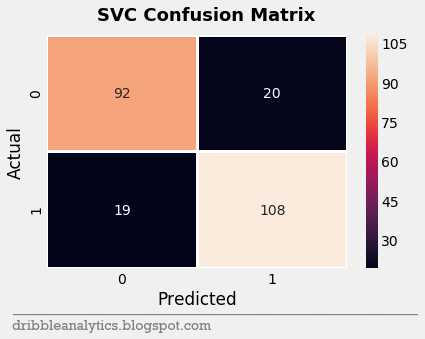

In [20]:
confusion_matrix(y_svc, 'svc')

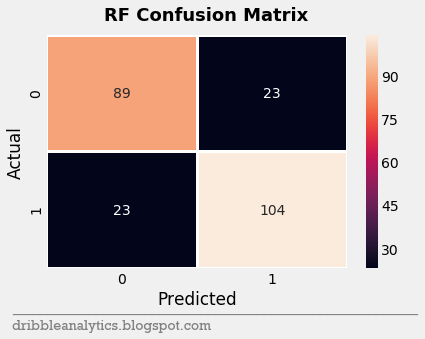

In [21]:
confusion_matrix(y_rf, 'rf')

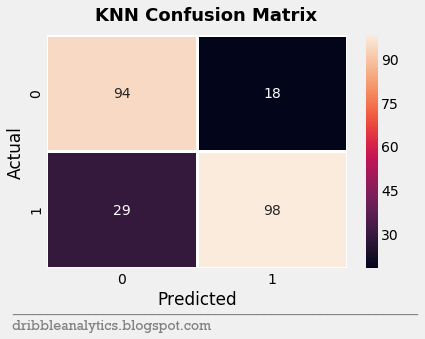

In [22]:
confusion_matrix(y_knn, 'knn')

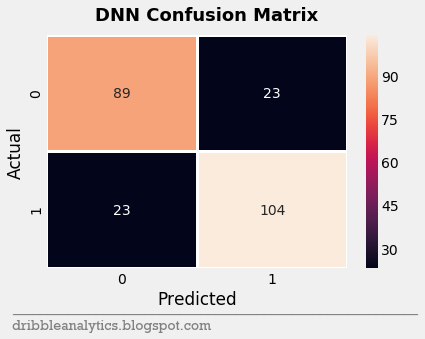

In [23]:
confusion_matrix(y_dnn, 'dnn')

# Create ROC curve

In [24]:
def roc_curve(model):

    proba = model.predict_proba(xtest)
    pos_prob = proba[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(ytest, pos_prob)
    
    return (fpr, tpr, pos_prob)

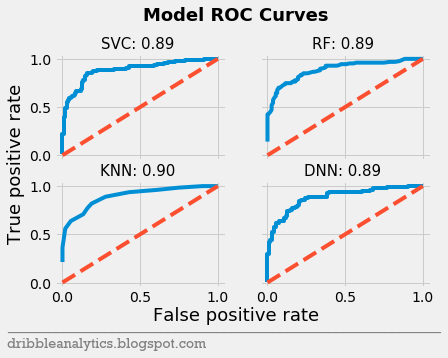

In [25]:
plt.style.use('fivethirtyeight')

roc, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex = True)

fpr, tpr, pos_prob = roc_curve(svc)
ax1.plot(fpr, tpr)
ax1.plot([0, 1], [0, 1], linestyle = '--')
ax1.set_title("SVC: %.2f" % metrics.roc_auc_score(ytest, pos_prob), size = 15, x = .485, ha = 'center')

fpr, tpr, pos_prob = roc_curve(rf)
ax2.plot(fpr, tpr)
ax2.plot([0, 1], [0, 1], linestyle = '--')
ax2.set_title("RF: %.2f" % metrics.roc_auc_score(ytest, pos_prob), size = 15, x = .485, ha = 'center')

fpr, tpr, pos_prob = roc_curve(knn)
ax3.plot(fpr, tpr)
ax3.plot([0, 1], [0, 1], linestyle = '--')
ax3.set_title("KNN: %.2f" % metrics.roc_auc_score(ytest, pos_prob), size = 15, x = .485, ha = 'center')

fpr, tpr, pos_prob = roc_curve(dnn)
ax4.plot(fpr, tpr)
ax4.plot([0, 1], [0, 1], linestyle = '--')
ax4.set_title("DNN: %.2f" % metrics.roc_auc_score(ytest, pos_prob), size = 15, x = .485, ha = 'center')

roc.text(-0.03, 0.5, "True positive rate", va='center', rotation='vertical', size = 18)
roc.text(0.5, -0.045, "False positive rate", ha = 'center', size = 18)

roc.suptitle("Model ROC Curves", y = 1.045, weight = 'bold', size = 18)

roc.text(x = -0.03, y = -0.08,
        s = '______________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

roc.text(x = -0.03, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

roc.savefig('roc.png', dpi = 400, bbox_inches = 'tight')

# Prediction

In [26]:
dfCurrentNames = dfCurrent.iloc[:, 0]
dfCurrentPredict = dfCurrent[['Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'VORP', 'WS', 'All-Star']]

dfCurrent.head()

,Player,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,AST,STL,...,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games,All-Star
0,LaMarcus Aldridge,SAS,80.610169,45.864407,11,32.7,21.0,9.0,2.6,0.5,...,8.477966,0.155,2.223729,1.3,58,33,6.1,1.6,59,1
1,Karl-Anthony Towns,MIN,82.000000,38.842105,18,33.1,23.1,12.0,3.2,0.9,...,11.508772,0.203,6.042105,6.9,57,27,8.0,4.2,57,1
2,Klay Thompson,GSW,80.561404,58.982456,3,34.1,21.9,4.0,2.2,1.1,...,5.322807,0.094,0.719298,-1.0,56,41,3.7,0.5,57,1
3,Ben Simmons,PHI,80.586207,52.310345,8,33.8,16.8,9.0,7.9,1.3,...,8.624138,0.152,4.100000,4.1,57,37,6.1,2.9,58,1
4,Damian Lillard,POR,80.561404,48.912281,9,35.3,26.3,4.5,6.4,1.2,...,11.796491,0.198,5.178947,5.3,56,34,8.2,3.6,57,1


In [27]:
def make_pred(model):

    proba = model.predict_proba(dfCurrentPredict)
    pos_prob = proba[:, 1]
    
    combined_list = [[i, j] for i, j in zip(dfCurrentNames, pos_prob)]
    combined_list = sorted(combined_list, key = itemgetter(1), reverse = True)
    
    for i in combined_list:
        print(i)
        
    return pos_prob

In [28]:
svc_prob = make_pred(svc)

['James Harden', 0.9999996444185352]
['Giannis Antetokounmpo', 0.9999981433737083]
['Kevin Durant', 0.9955684548148866]
['Paul George', 0.994856544680319]
['Stephen Curry', 0.9911977165307627]
['Joel Embiid', 0.9903291411872305]
['Nikola Jokic', 0.9784953096210194]
['Damian Lillard', 0.9611175203631419]
['Russell Westbrook', 0.9605517313365126]
['Kawhi Leonard', 0.9539944218854027]
['Rudy Gobert', 0.9354834888721276]
['Kyrie Irving', 0.8911821315159367]
['Anthony Davis', 0.7666778628306966]
['LeBron James', 0.7298971440977895]
['Ben Simmons', 0.564411547162046]
['Karl-Anthony Towns', 0.4755278448143358]
['Blake Griffin', 0.4621750058884128]
['LaMarcus Aldridge', 0.31505921882294574]
['Kemba Walker', 0.31265981097263845]
['Nikola Vucevic', 0.2857190371668343]
['Kyle Lowry', 0.2109457067216606]
['Bradley Beal', 0.20950762915417076]
['Klay Thompson', 0.15535486479642355]
["D'Angelo Russell", 0.138328661592743]
['Khris Middleton', 0.08550710820938584]


In [29]:
rf_prob = make_pred(rf)

['James Harden', 1.0]
['Giannis Antetokounmpo', 1.0]
['Paul George', 1.0]
['Kevin Durant', 0.99]
['Damian Lillard', 0.94]
['Stephen Curry', 0.94]
['Nikola Jokic', 0.9]
['Rudy Gobert', 0.85]
['Joel Embiid', 0.82]
['Russell Westbrook', 0.73]
['Karl-Anthony Towns', 0.67]
['Kawhi Leonard', 0.67]
['LeBron James', 0.66]
['Kyrie Irving', 0.65]
['Anthony Davis', 0.48]
['Kemba Walker', 0.44]
['Blake Griffin', 0.39]
['Ben Simmons', 0.37]
['Nikola Vucevic', 0.33]
['Klay Thompson', 0.32]
['LaMarcus Aldridge', 0.3]
['Khris Middleton', 0.15]
["D'Angelo Russell", 0.11]
['Kyle Lowry', 0.11]
['Bradley Beal', 0.07]


In [30]:
knn_prob = make_pred(knn)

['James Harden', 1.0]
['Kevin Durant', 1.0]
['Giannis Antetokounmpo', 1.0]
['Paul George', 1.0]
['Stephen Curry', 1.0]
['Kawhi Leonard', 0.9166666666666666]
['Nikola Jokic', 0.9166666666666666]
['Joel Embiid', 0.9166666666666666]
['LaMarcus Aldridge', 0.75]
['Damian Lillard', 0.75]
['Kyrie Irving', 0.75]
['Russell Westbrook', 0.6666666666666666]
['Rudy Gobert', 0.6666666666666666]
['LeBron James', 0.5833333333333334]
['Anthony Davis', 0.5]
['Kemba Walker', 0.5]
['Ben Simmons', 0.4166666666666667]
['Klay Thompson', 0.3333333333333333]
['Nikola Vucevic', 0.3333333333333333]
['Kyle Lowry', 0.3333333333333333]
['Khris Middleton', 0.25]
['Karl-Anthony Towns', 0.16666666666666666]
['Bradley Beal', 0.16666666666666666]
['Blake Griffin', 0.16666666666666666]
["D'Angelo Russell", 0.08333333333333333]


In [31]:
dnn_prob = make_pred(dnn)

['James Harden', 0.9997162703558162]
['Giannis Antetokounmpo', 0.9988003197142484]
['Rudy Gobert', 0.9979259762148257]
['Kevin Durant', 0.9889032132874648]
['Paul George', 0.9882096818802928]
['Stephen Curry', 0.9665439915384447]
['Nikola Jokic', 0.9598996160393231]
['Damian Lillard', 0.9525247599270199]
['Joel Embiid', 0.9502513861439553]
['Kawhi Leonard', 0.9417431003841155]
['Kyrie Irving', 0.842796905899326]
['Russell Westbrook', 0.8369270558601825]
['LeBron James', 0.7411871440990601]
['Anthony Davis', 0.4770234589572114]
['Ben Simmons', 0.4128577287535629]
['Karl-Anthony Towns', 0.32587181584529334]
['Blake Griffin', 0.31990038630534734]
['Kemba Walker', 0.31294448567433275]
['LaMarcus Aldridge', 0.30607176214485093]
['Kyle Lowry', 0.16450785746994553]
['Klay Thompson', 0.12475810722130823]
['Nikola Vucevic', 0.11685370663462687]
['Bradley Beal', 0.11535087400179511]
['Khris Middleton', 0.10818809420739281]
["D'Angelo Russell", 0.06324902771341853]


In [32]:
avg_prob = []

for i, j, k, l in zip(svc_prob, rf_prob, knn_prob, dnn_prob):
    avg_prob.append((i + j + k + l) / 4)
    
avg_list = [[i, j] for i, j in zip(dfCurrentNames, avg_prob)]
avg_list = sorted(avg_list, key = itemgetter(1), reverse = True)

for i in avg_list:
    print(i)

['James Harden', 0.9999289786935879]
['Giannis Antetokounmpo', 0.9996996157719892]
['Paul George', 0.995766556640153]
['Kevin Durant', 0.9936179170255879]
['Stephen Curry', 0.9744354270173019]
['Nikola Jokic', 0.9387653980817523]
['Joel Embiid', 0.9193117984994631]
['Damian Lillard', 0.9009105700725405]
['Kawhi Leonard', 0.8706010472340462]
['Rudy Gobert', 0.862519032938405]
['Russell Westbrook', 0.7985363634658404]
['Kyrie Irving', 0.7834947593538157]
['LeBron James', 0.6786044053825457]
['Anthony Davis', 0.555925330446977]
['Ben Simmons', 0.4409839856455689]
['LaMarcus Aldridge', 0.4177827452419492]
['Karl-Anthony Towns', 0.40951658183157397]
['Kemba Walker', 0.39140107416174275]
['Blake Griffin', 0.3346855147151067]
['Nikola Vucevic', 0.26647651928369864]
['Klay Thompson', 0.23336157633776627]
['Kyle Lowry', 0.20469672438123487]
['Khris Middleton', 0.14842380060419466]
['Bradley Beal', 0.14038129245565814]
["D'Angelo Russell", 0.09872775565987371]
